## Команда 7, кейс 7 "Бинарная классификация отказов оборудования"

Краткое описание кейса:  
Нужно предсказать, произойдёт ли отказ оборудования на основе его технических характеристик, условий эксплуатации и истории работы

Ожидаемый результат:
- Обученная модель бинарной классификации, определяющая вероятность отказа оборудования

Основной функционал:
- Импорт и анализ исторических данных
- Предобработка и очистка данных
- Обучение модели (SVM, деревья решений)
- Оценка метрик Precision, Recall, ROC-AUC

Состав команды и роли:
- Елена Сергеева - Project Manager
- Раиль Фахртдинов - Data Analyst
- Оксана Дергачева - Data Analyst
- Артур Халимов - Data Analyst
- Александр Новиков - ML Engineer
- Виталий Миляков - ML Engineer

## Введение

Изучаемый в данной работе датасет представляет собой данные телеметрии промышленного оборудования, собранные с датчиков мониторинга. Каждая строка соответствует состоянию оборудования в определенный момент времени с показаниями различных сенсоров.

Датасет включает 14 признаков. Данные уже поделены на train и test.

Источник: https://www.kaggle.com/competitions/playground-series-s3e17/data

## Основная цель проектного исследования
Разработка системы предиктивного обслуживания промышленного оборудования для прогнозирования отказов на основе телеметрических данных.

**Основная задача:**
Построение моделей бинарной классификации для предсказания отказа оборудования (Machine failure).

## Описание признаков

**1. id - Уникальный идентификатор**

Тип: Числовой

Описание: Порядковый номер записи в датасете


**2. Product ID - Идентификатор оборудования**

Тип: Строковый (категориальный)

Формат: Буква + 5 цифр (пример: L50096, M20343)

Описание: Уникальный серийный номер единицы оборудования

Назначение: Идентификация конкретного экземпляра оборудования

**3. Type - Тип оборудования**

Тип: Категориальный

Значения: L, M (разные модификации/классы)

Описание: Классификация оборудования по типам или моделям

Назначение: Учет конструктивных особенностей разных типов

**4. Air temperature [K] - Температура окружающего воздуха**
   
Тип: Числовой, непрерывный

Единица: Кельвины (K)

Диапазон: приблизительно 298-303 K (25-30°C)

Описание: Температура воздуха в рабочей зоне оборудования

Назначение: Мониторинг условий эксплуатации

**5. Process temperature [K] - Температура процесса**

Тип: Числовой, непрерывный

Единица: Кельвины (K)

Диапазон: приблизительно 308-313 K (35-40°C)

Описание: Температура непосредственно в рабочем процессе

Назначение: Контроль теплового режима работы

**6. Rotational speed [rpm] - Скорость вращения**
   
Тип: Числовой, непрерывный

Единица: Обороты в минуту (rpm)

Диапазон: приблизительно 1400-2900 об/мин

Описание: Скорость вращения деталей оборудования

Назначение: Мониторинг рабочих режимов

**7. Torque [Nm] - Крутящий момент**

Тип: Числовой, непрерывный

Единица: Ньютон-метры (Nm)

Диапазон: приблизительно 4-77 Nm

Описание: Сила вращения, создаваемая оборудованием

Назначение: Контроль механической нагрузки

**8. Tool wear [min] - Износ инструмента**

Тип: Числовой, непрерывный

Единица: Минуты (min)

Диапазон: 0-253 минуты

Описание: Время наработки с момента последней замены инструмента

Назначение: Оценка степени износа компонентов

**9. Machine failure - Факт отказа оборудования**

Тип: Бинарный (0/1)

Значения:

0 - оборудование работает нормально

1 - произошел отказ оборудования

Описание: Основная целевая переменная для бинарной классификации

Назначение: Общий индикатор неисправности

**10. TWF - Отказ из-за износа инструмента**

Тип: Бинарный (0/1)

Расшифровка: Tool Wear Failure

Описание: Отказ, вызванный чрезмерным износом рабочего инструмента

Связь: Зависит от параметра Tool wear [min]

**11. HDF - Отказ системы теплорассеивания**

Тип: Бинарный (0/1)

Расшифровка: Heat Dissipation Failure

Описание: Неисправность системы охлаждения или теплоотвода

Связь: Зависит от температурных параметров

**12. PWF - Отказ электропитания**

Тип: Бинарный (0/1)

Расшифровка: Power Failure

Описание: Проблемы с подачей электроэнергии к оборудованию

Связь: Может проявляться в скачках параметров работы

**13. OSF - Отказ из-за перегрузки**

Тип: Бинарный (0/1)

Расшифровка: Overstrain Failure

Описание: Механический отказ вследствие превышения допустимых нагрузок

Связь: Зависит от Torque и Rotational speed

**14. RNF - Случайный отказ**

Тип: Бинарный (0/1)

Расшифровка: Random Failure

Описание: Непредсказуемые отказы, не связанные с другими конкретными причинами

Связь: Сложно предсказуем по имеющимся параметрам

## Ход исследования
1. Загрузка данных и изучение общей информации
2. Предобработка данных
3. Проведение исследовательского анализа данных
4. Общий вывод по результатам исследования

## 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import phik
from phik.report import plot_correlation_matrix

In [3]:
# Добавим настройки отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [9]:
# Загрузка данных train
data = pd.read_csv("train.csv")

# Получим первых 20 строк данных train
data.head(20)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


In [11]:
# Получим общую информацию о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

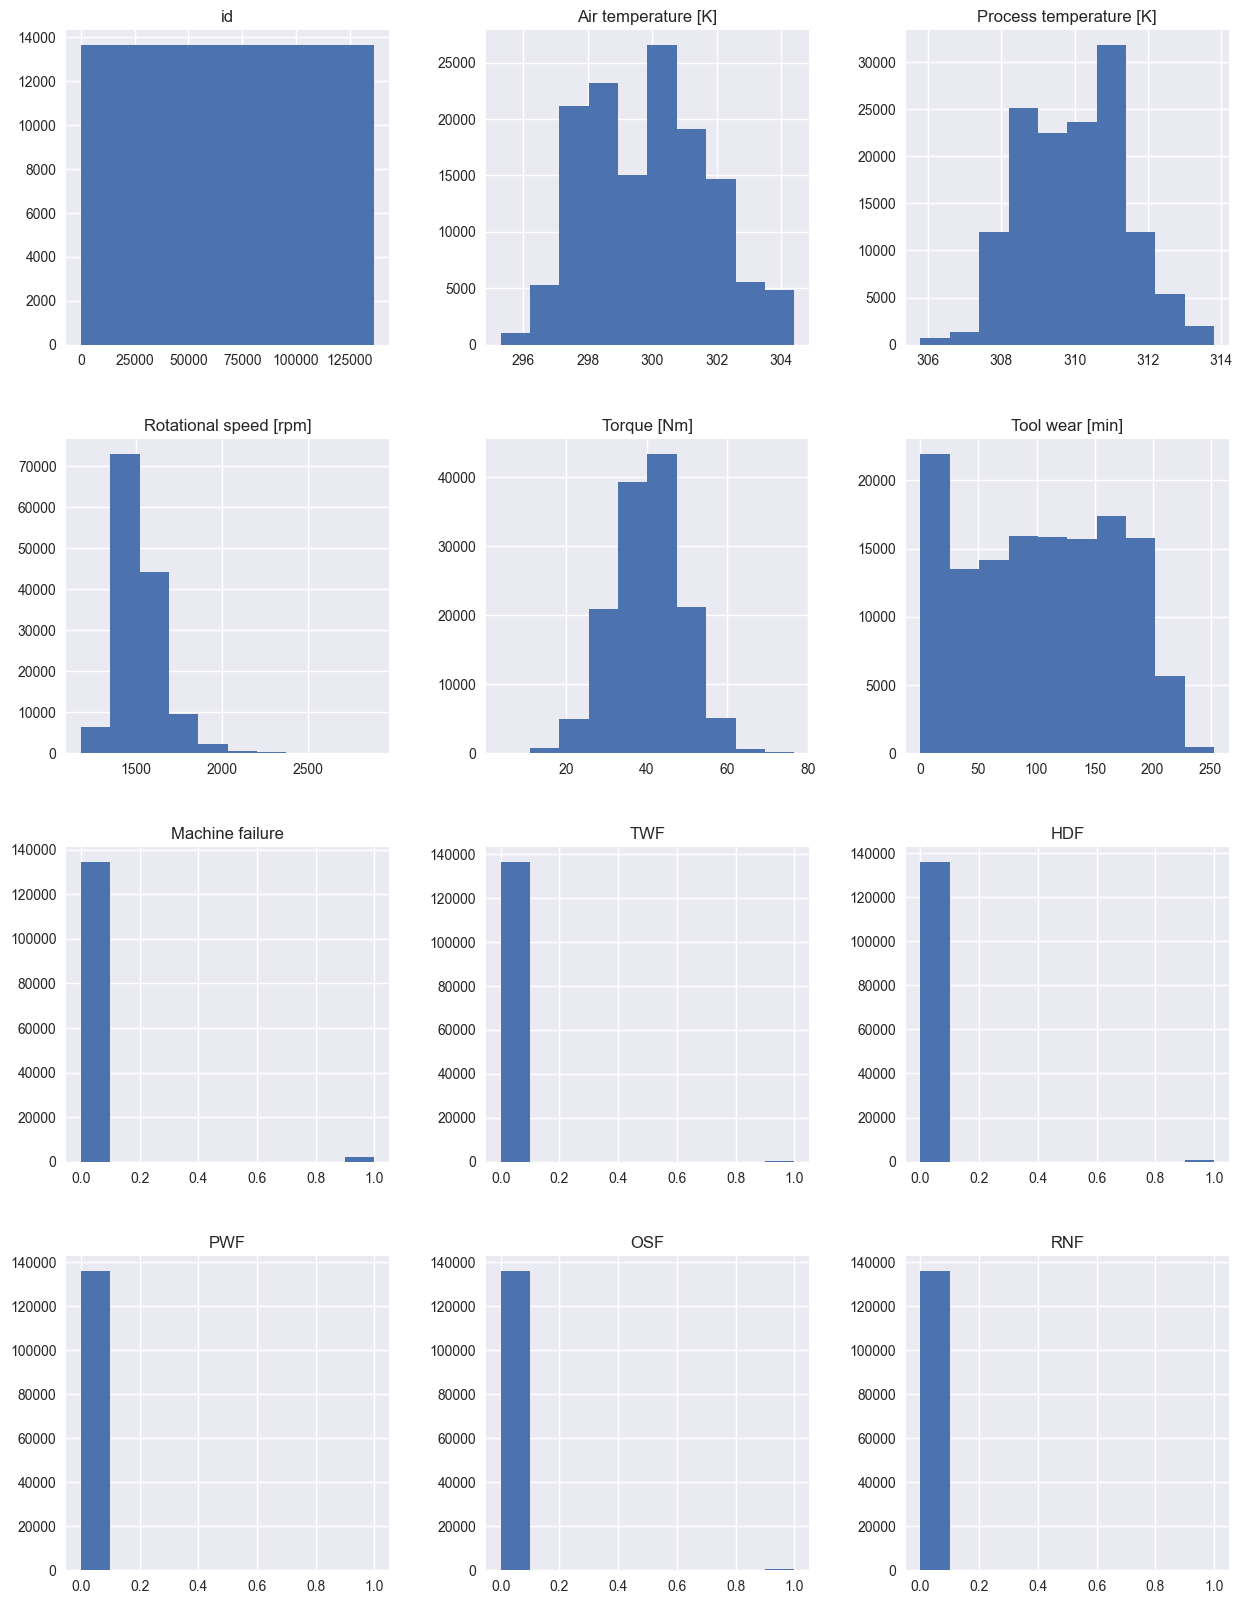

In [195]:
# Построим гистограммы для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20))
plt.show()

In [13]:
# Произведем проверку данных на наличие явных дубликатов в train 
data.duplicated().sum()

0

In [15]:
# Произведем проверку данных на наличие пропусков в train 
data.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [19]:
# Загрузим данные test
data_test = pd.read_csv("test.csv")

# Получим первых 20 строк данных test
data_test.head(20)

# Если потребуется объединение в один датасет
#data_all = pd.concat([data, data_test], ignore_index=True)

#print(f"Combined data shape: {data_all.shape}")

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
5,136434,L49438,L,299.1,308.3,1489,38.2,139,0,0,0,0,0
6,136435,L50286,L,299.8,309.1,1429,39.9,207,0,0,0,0,0
7,136436,L52589,L,302.7,312.4,1540,46.2,17,0,0,0,0,0
8,136437,H37110,H,300.7,311.9,1613,36.0,12,0,0,0,0,0
9,136438,L54886,L,300.5,311.4,1708,32.2,57,0,0,0,0,0


In [21]:
# Получим общую информацию о данных в таблице data_test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


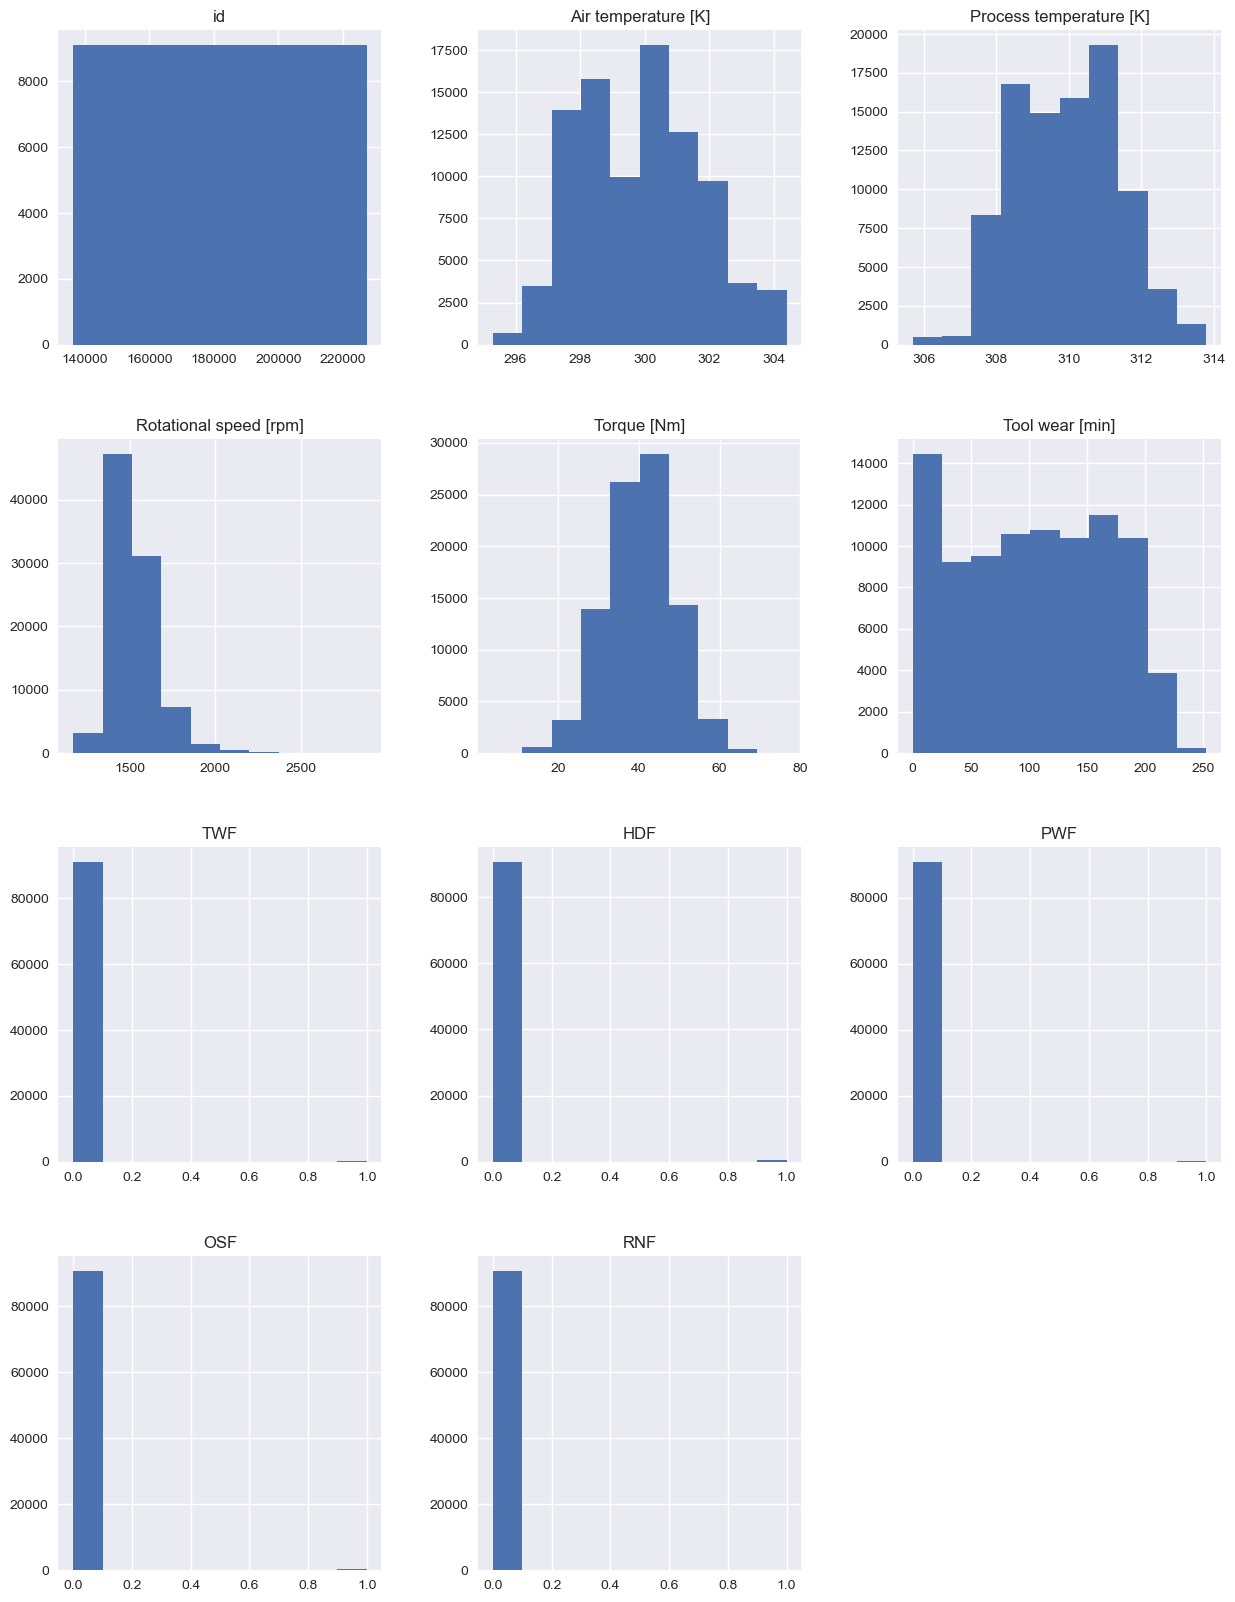

In [23]:
# Построим гистограммы для всех числовых столбцов таблицы на одном графике для данных test
data_test.hist(figsize=(15, 20))
plt.show()

In [25]:
# Произведем проверку данных на наличие явных дубликатов в test
data_test.duplicated().sum()

0

In [27]:
# Произведем проверку данных на наличие пропусков в test
data_test.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

**Выводы по шагу 1 "Загрузка и изучение общей информации":**

Из общей информации о данных известно, что в датасете train - 136429 записей, в датасете test - 90954 записей.

Предварительно можно утверждать, что данных достаточно для проверки гипотез.

Пропусков в данных нет.

Явные дубликаты отсутствуют.

Распределение данных train и test схоже.

Test-данные исключают целевую переменную.

## 2. Предобработка данных

In [36]:
# Переименуем столбцы в соответсвии с 'best practices'
data.rename(columns={
    'Air temperature [K]': 'Air_temperature_k',
    'Process temperature [K]': 'Process_temperature_k',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_nm',
    'Tool wear [min]': 'Tool_wear_min'
}, inplace=True)


data_test.rename(columns={
    'Air temperature [K]': 'Air_temperature_k',
    'Process temperature [K]': 'Process_temperature_k',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_nm',
    'Tool wear [min]': 'Tool_wear_min'
}, inplace=True)

In [38]:
# Рассмотрим типы данных в каждом столбце
data.info()

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     136429 non-null  int64  
 1   Product ID             136429 non-null  object 
 2   Type                   136429 non-null  object 
 3   Air_temperature_k      136429 non-null  float64
 4   Process_temperature_k  136429 non-null  float64
 5   Rotational_speed_rpm   136429 non-null  int64  
 6   Torque_nm              136429 non-null  float64
 7   Tool_wear_min          136429 non-null  int64  
 8   Machine failure        136429 non-null  int64  
 9   TWF                    136429 non-null  int64  
 10  HDF                    136429 non-null  int64  
 11  PWF                    136429 non-null  int64  
 12  OSF                    136429 non-null  int64  
 13  RNF                    136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
m

In [42]:
# Сравним наборы данных
print(data.columns.tolist())
print(data_test.columns.tolist())

['id', 'Product ID', 'Type', 'Air_temperature_k', 'Process_temperature_k', 'Rotational_speed_rpm', 'Torque_nm', 'Tool_wear_min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
['id', 'Product ID', 'Type', 'Air_temperature_k', 'Process_temperature_k', 'Rotational_speed_rpm', 'Torque_nm', 'Tool_wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [48]:
# 1. Удаляем id и Product ID в обоих датасетах
cols_to_drop = ["id", "Product ID"]

for df in (data, data_test):
    df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Type -> категориальный
for df in (data, data_test):
    df["Type"] = df["Type"].astype("category")

# 3. Бинарные признаки

# в train есть целевая переменная
binary_cols_train = ["Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"]
for col in binary_cols_train:
    data[col] = data[col].astype("int8")

# в test целевой нет
binary_cols_test = ["TWF", "HDF", "PWF", "OSF", "RNF"]
for col in binary_cols_test:
    data_test[col] = data_test[col].astype("int8")

# 4. Числовые признаки -> float32
numeric_cols = [
    "Air_temperature_k",
    "Process_temperature_k",
    "Rotational_speed_rpm",
    "Torque_nm",
    "Tool_wear_min",
]

for df in (data, data_test):
    for col in numeric_cols:
        df[col] = df[col].astype("float32")

In [50]:
# Рассмотрим типы данных в каждом столбце после преобразования
data.info()

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Type                   136429 non-null  category
 1   Air_temperature_k      136429 non-null  float32 
 2   Process_temperature_k  136429 non-null  float32 
 3   Rotational_speed_rpm   136429 non-null  float32 
 4   Torque_nm              136429 non-null  float32 
 5   Tool_wear_min          136429 non-null  float32 
 6   Machine failure        136429 non-null  int8    
 7   TWF                    136429 non-null  int8    
 8   HDF                    136429 non-null  int8    
 9   PWF                    136429 non-null  int8    
 10  OSF                    136429 non-null  int8    
 11  RNF                    136429 non-null  int8    
dtypes: category(1), float32(5), int8(6)
memory usage: 3.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 9

## 3. Проведение исследовательского анализа данных

### 3.1. Изучение основных параметров датасета

Дальнейший анализ будем проводить на данных для обучения train.

In [52]:
# Посмотрим на распределение значений в данных
data.describe()

,Air_temperature_k,Process_temperature_k,Rotational_speed_rpm,Torque_nm,Tool_wear_min,Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862793,309.941040,1520.331055,40.348644,104.408905,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862511,1.385293,138.737717,8.501970,63.966579,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.299988,305.799988,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.299988,308.700012,1432.000000,34.599998,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400002,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200012,310.899994,1580.000000,46.099998,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.399994,313.799988,2886.000000,76.599998,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# Оценим баланс целевой переменной
print("Распределение целевой переменной:")
print(data['Machine failure'].value_counts(normalize=True))

Распределение целевой переменной:
Machine failure
0    0.984256
1    0.015744
Name: proportion, dtype: float64


In [56]:
# Анализ типов оборудования
print("Распределение по типам оборудования:")
print(data['Type'].value_counts())

Распределение по типам оборудования:
Type
L    95354
M    32152
H     8923
Name: count, dtype: int64


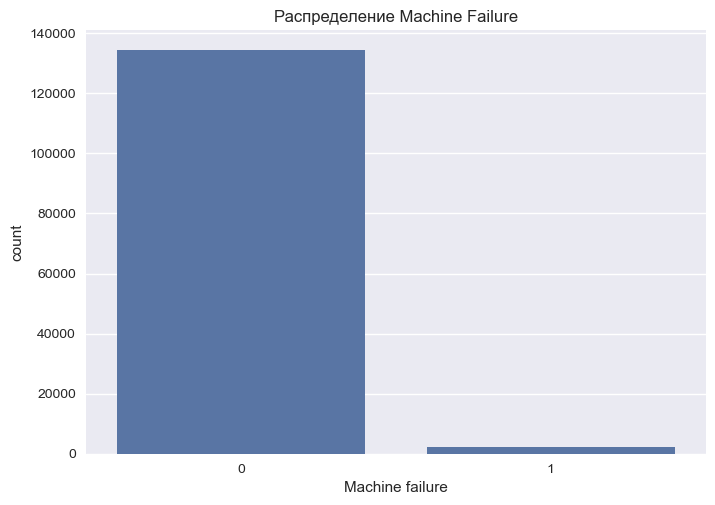

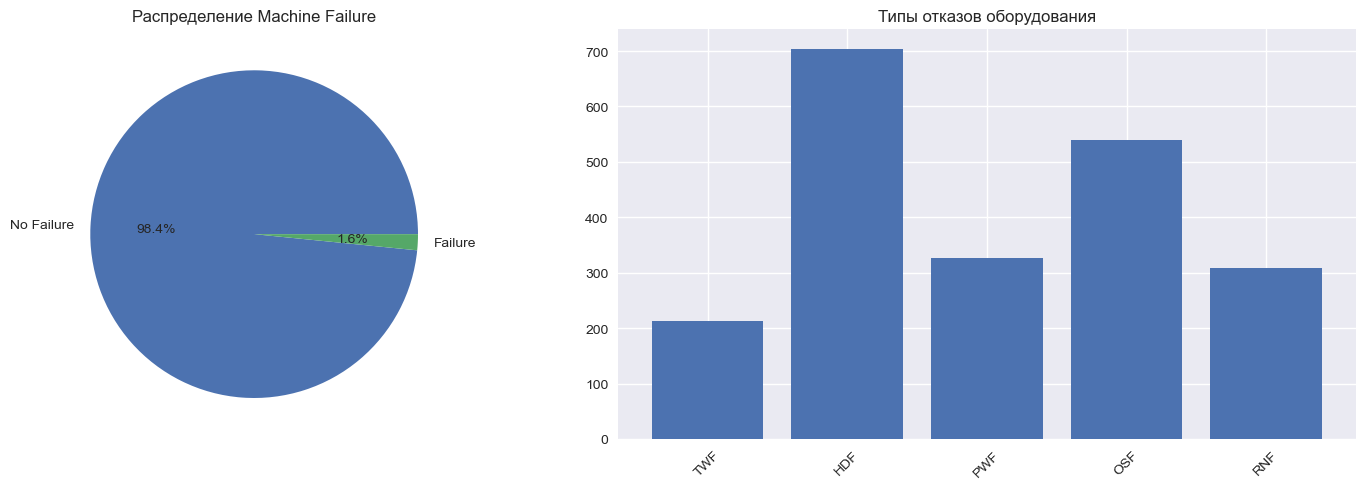

Статистика отказов:
Общее количество отказов: 2148
Процент отказов: 1.57%

Распределение по типам отказов:
TWF: 212 случаев (0.16%)
HDF: 704 случаев (0.52%)
PWF: 327 случаев (0.24%)
OSF: 540 случаев (0.40%)
RNF: 308 случаев (0.23%)


In [60]:
# Проведем анализ основного таргета - Machine failure
sns.countplot(data=data,x='Machine failure')
plt.title('Распределение Machine Failure')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
failure_counts = data['Machine failure'].value_counts()
plt.pie(failure_counts.values, labels=['No Failure', 'Failure'], autopct='%1.1f%%')
plt.title('Распределение Machine Failure')

plt.subplot(1, 2, 2)
failure_types = data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.bar(failure_types.index, failure_types.values)
plt.title('Типы отказов оборудования')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Рассмотрим статистику по типам отказов оборудования
print("Статистика отказов:")
print(f"Общее количество отказов: {data['Machine failure'].sum()}")
print(f"Процент отказов: {data['Machine failure'].mean()*100:.2f}%")
print("\nРаспределение по типам отказов:")
for col in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    print(f"{col}: {data[col].sum()} случаев ({data[col].mean()*100:.2f}%)")

**Можно сдеать предварительные выводы**:


**1. Сильный дисбаланс классов**

**Machine failure**: среднее = 0.0157 (1.57%)

Это означает, что только около 1.57% наблюдений имеют отказы оборудования

**2. Анализ основных признаков:**

**Температуры:**

Air_temperature_k: 295.3K - 304.4K (диапазон ~9K)

Process_temperature_k: 305.8K - 313.8K (диапазон ~8K)

Процесс всегда горячее воздуха (логично)

Распределения довольно узкие (std ~1.8-1.4)

**Механические параметры:**

Rotational_speed_rpm: 1181 - 2886 (довольно широкий разброс)

Torque_nm: 3.8 - 76.6 (широкий диапазон)

Tool_wear_min: 0 - 253 минуты (полный цикл износа инструмента)

**3. Потенциальные выбросы:**

Rotational_speed_rpm: max = 2886, в то время как 75% = 1580

Возможно, есть экстремальные режимы работы - нужно проверить на boxplot'ах

**4. Редкие события (failure modes):**

Все типы отказов очень редкие:

TWF: 0.15% (Tool Wear Failure)

HDF: 0.52% (Heat Dissipation Failure)

PWF: 0.24% (Power Failure)

OSF: 0.40% (Overstrain Failure)

RNF: 0.23% (Random Failures)

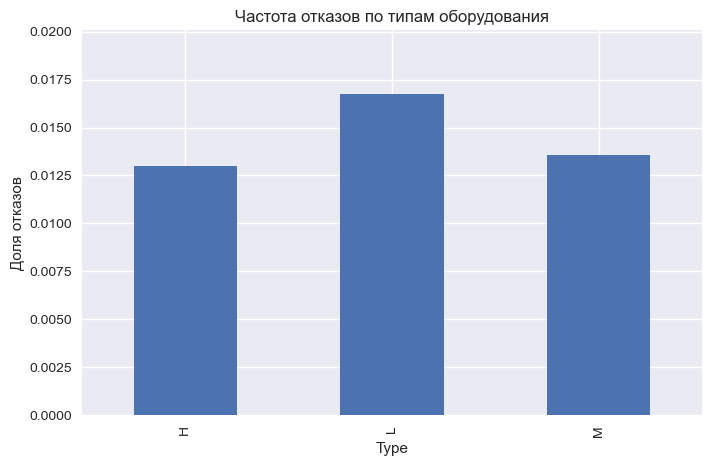

In [62]:
# Проанализируем частоту отказов по типам оборудования
failure_rate = data.groupby("Type", observed=True)["Machine failure"].mean()

failure_rate.plot(kind="bar", figsize=(8,5))
plt.title("Частота отказов по типам оборудования")
plt.ylabel("Доля отказов")
plt.ylim(0, failure_rate.max() * 1.2)
plt.show()

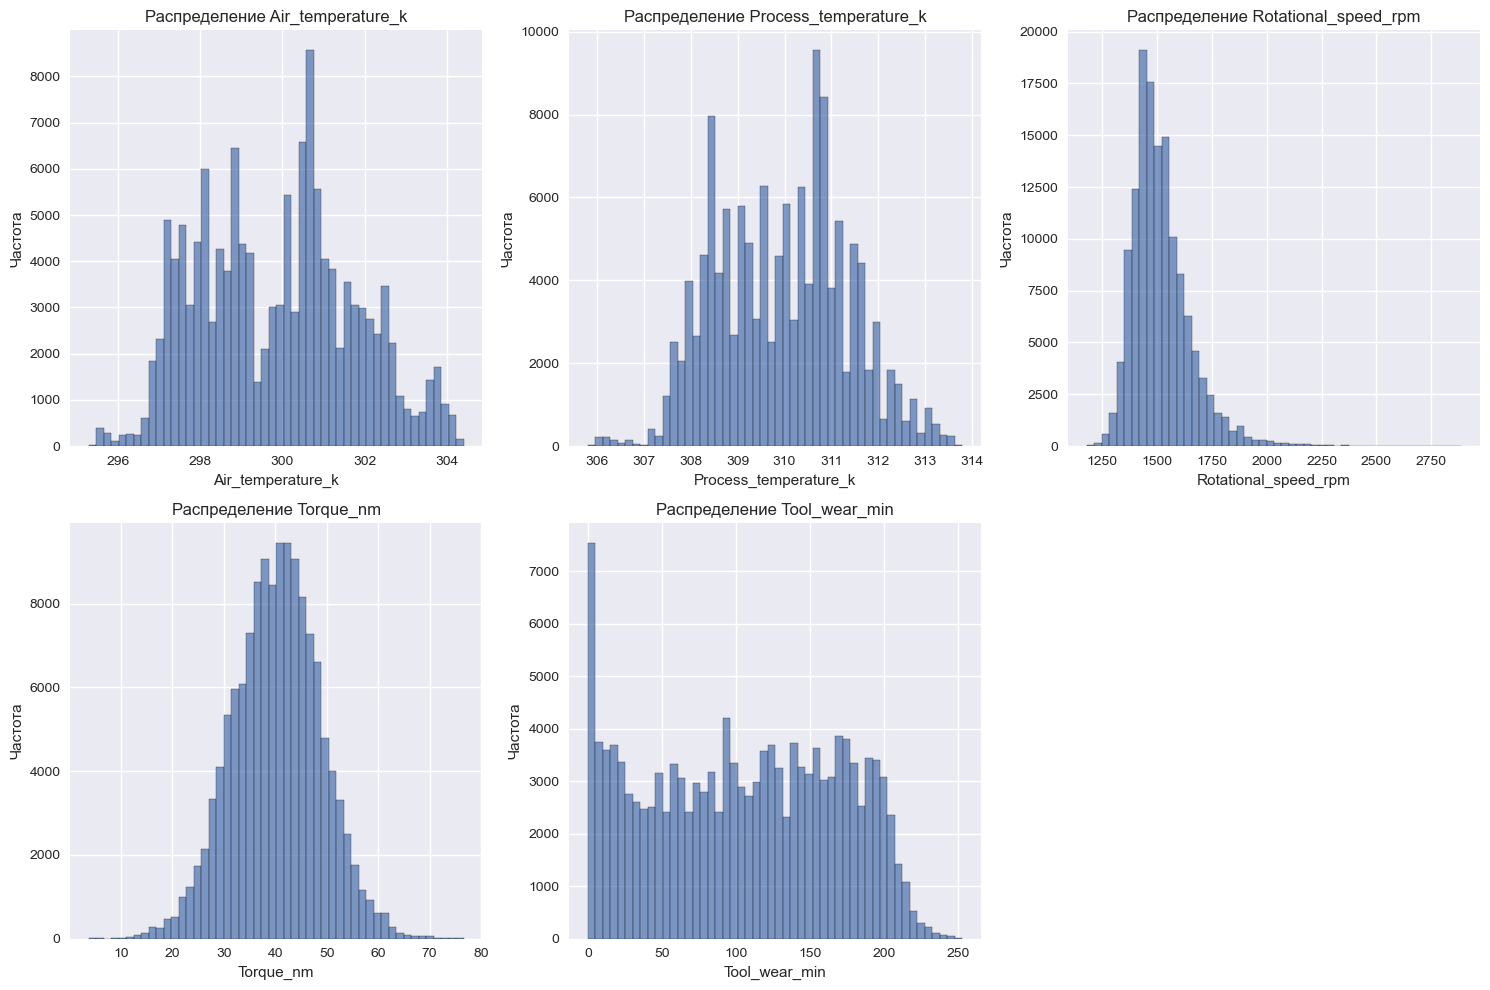

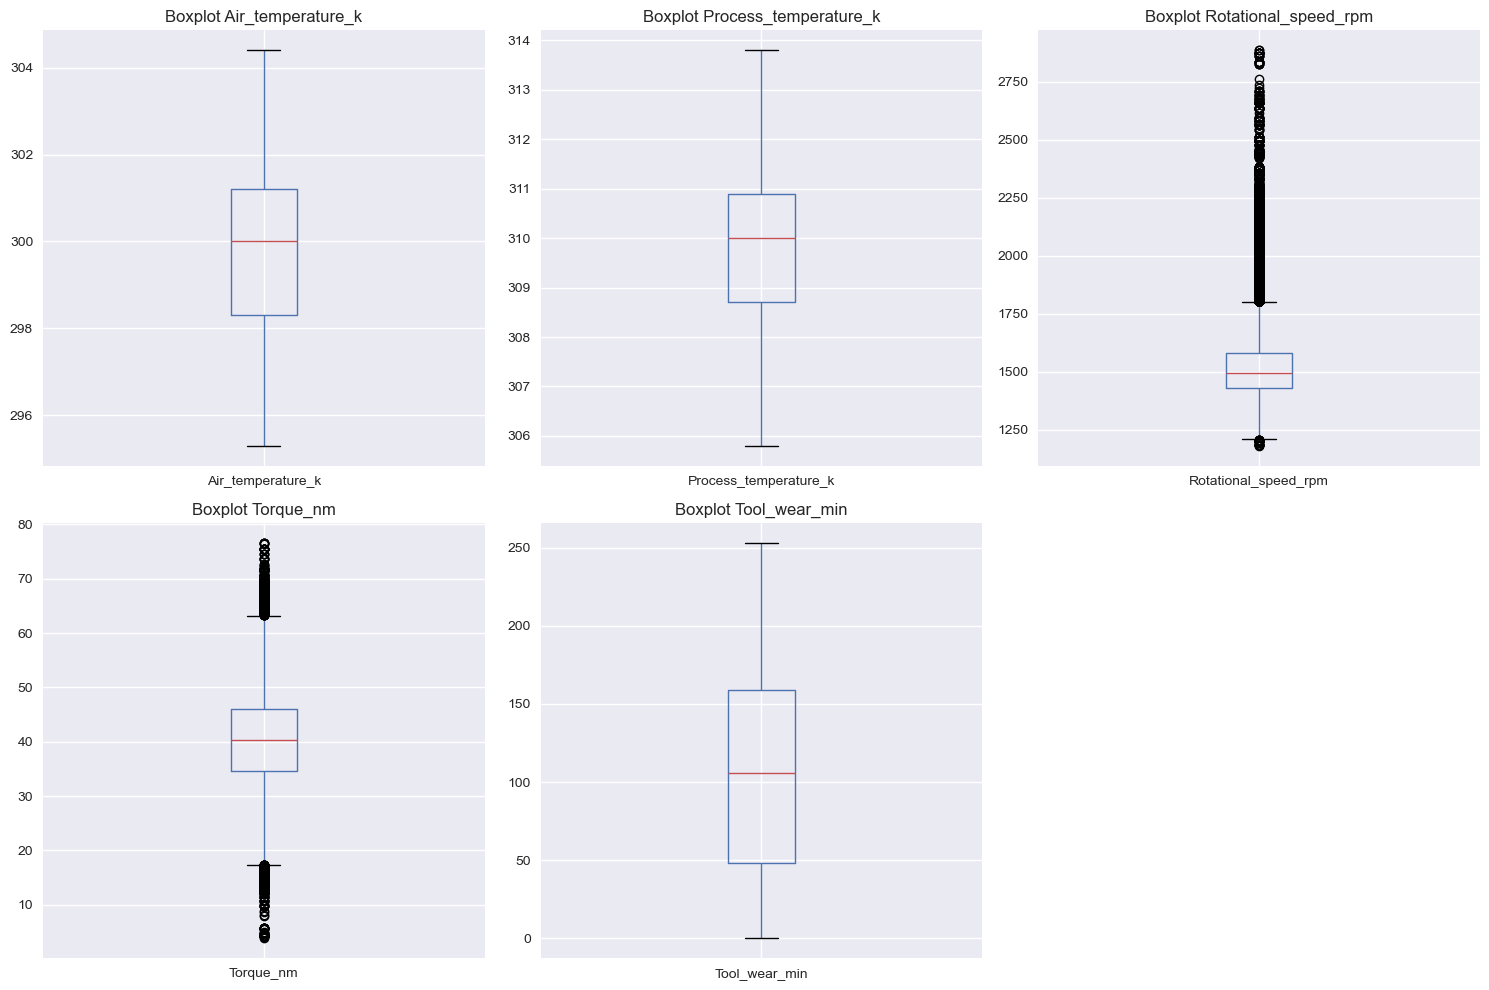

In [68]:
# Построим гистограммы числовых признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(data[col], bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

# Удаляем пустой subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

# Построим Boxplots для выявления выбросов
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Анализ гистограмм:**

**1. Температурные параметры:**
   
**Air_temperature_k:** Нормальное распределение с центром ~300K

**Process_temperature_k:** Также нормальное распределение, смещенное относительно воздушной температуры (центр ~310K)

Вывод: Оба параметра имеют стабильные, предсказуемые распределения


**2. Механические параметры:**
   
**Rotational_speed_rpm:** Мультимодальное распределение с несколькими пиками

Это может указывать на различные режимы работы оборудования

Основные пики: ~1250, ~1500, ~1750, ~2000, ~2250, ~2500 rpm


**Torque_nm:** Распределение близко к нормальному с центром ~40 Нм

Вывод: Оборудование работает в нескольких четко определенных режимах

**3. Tool_wear_min:**
Равномерное распределение по всему диапазону (0-250 минут)

Это говорит о том, что данные собраны за полные циклы работы инструмента

Нет перекоса в сторону нового или изношенного состояния


**Анализ boxplots (выбросы):**

**Температуры:**
Данные "чистые" и стабильные

**Rotational_speed_rpm:**
Значительное количество значений "за усами" в обе стороны, могут быть ключевыми для предсказания отказов

**Torque_nm:**
Умеренное количество значений за усами (выбросов?) в обе стороны.
Могут указывать на аномальные режимы работы

**Tool_wear_min:**
Выбросов нет.
Можно сделать предположение, что износ инструмента прогрессирует предсказуемо

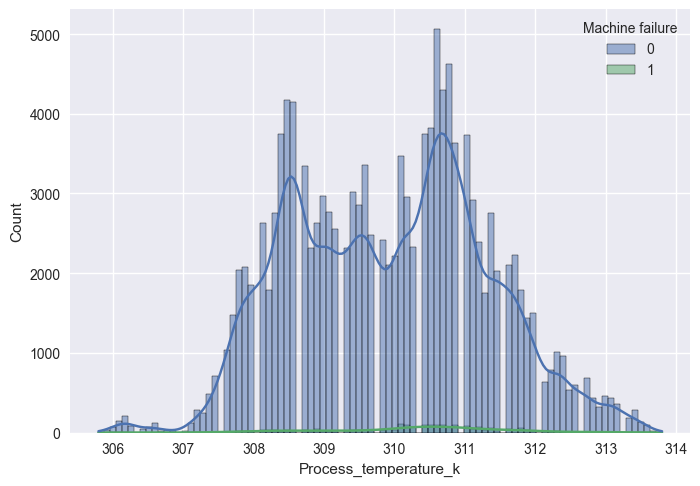

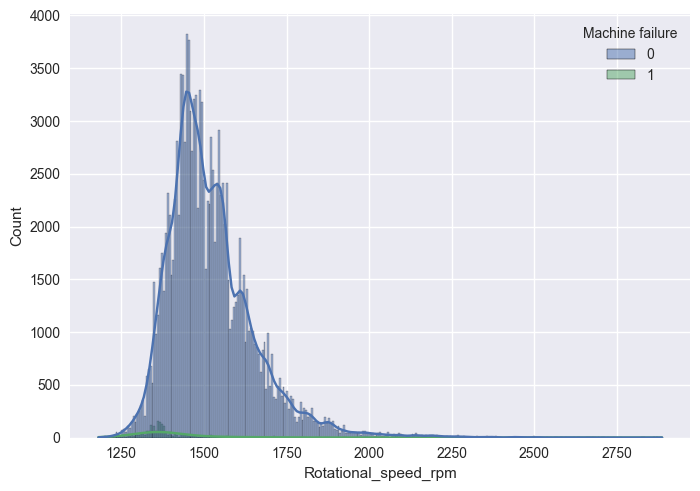

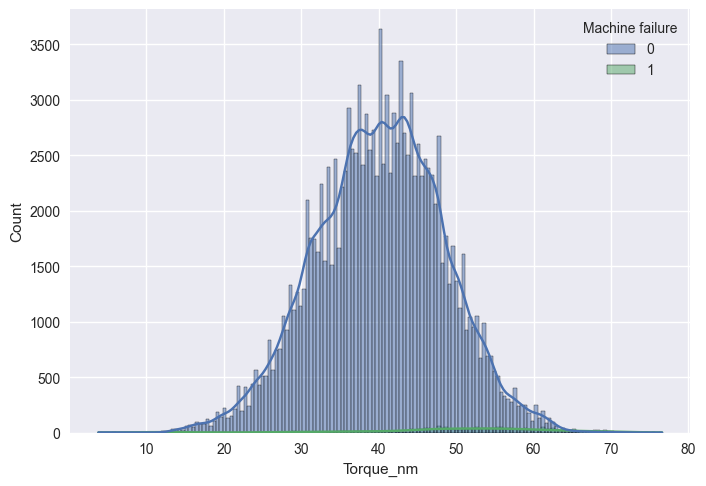

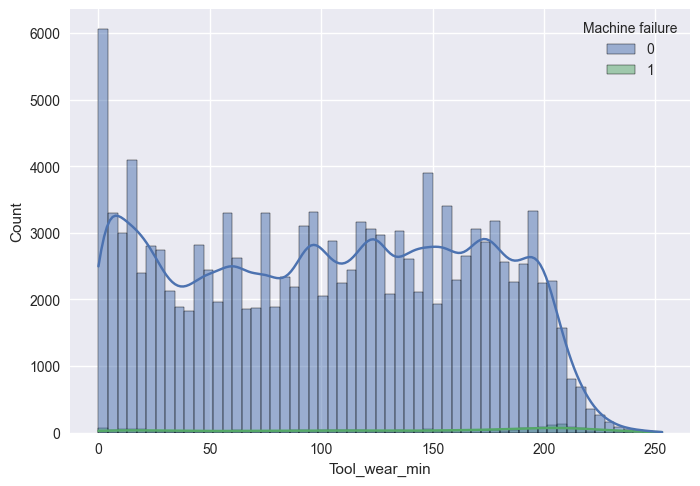

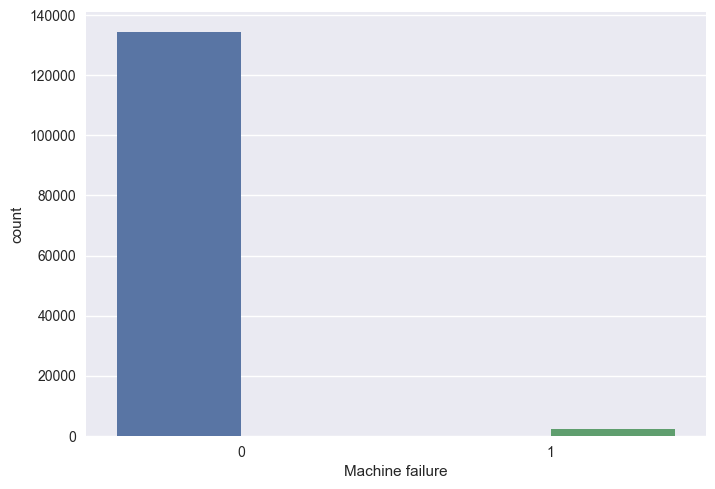

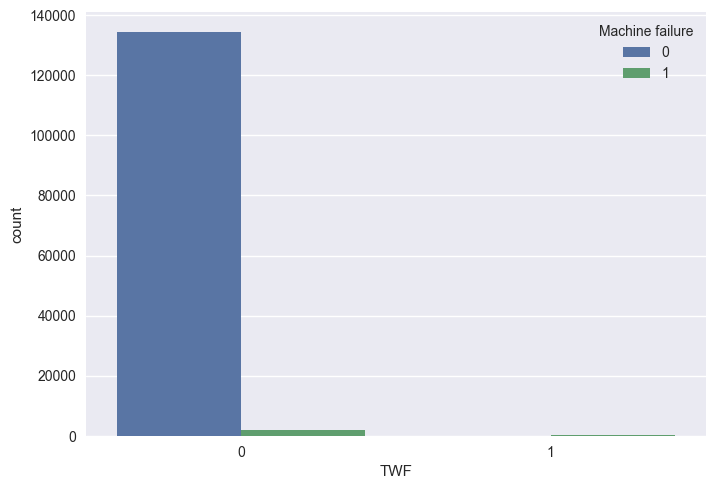

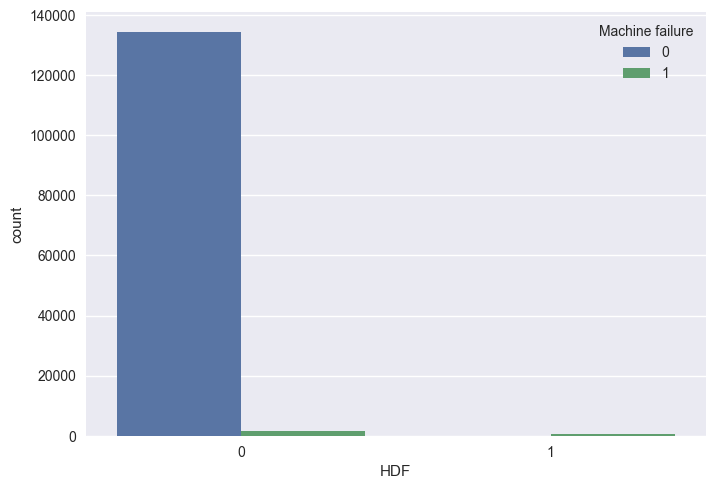

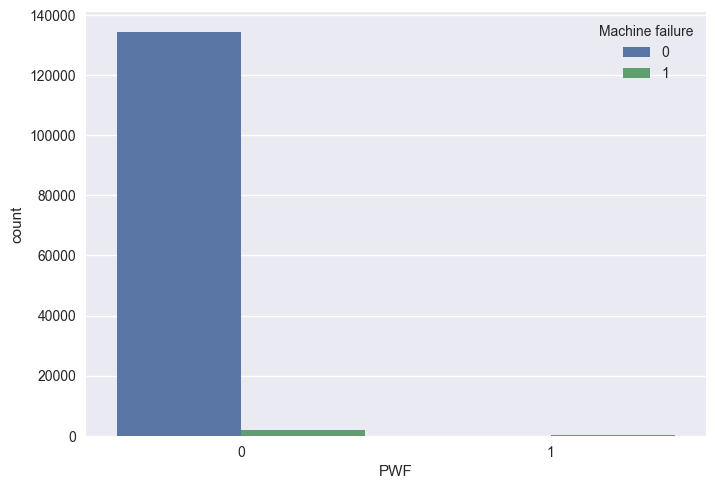

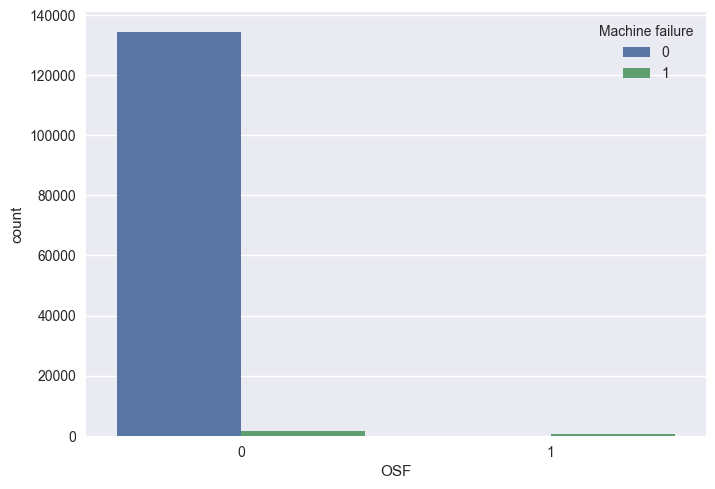

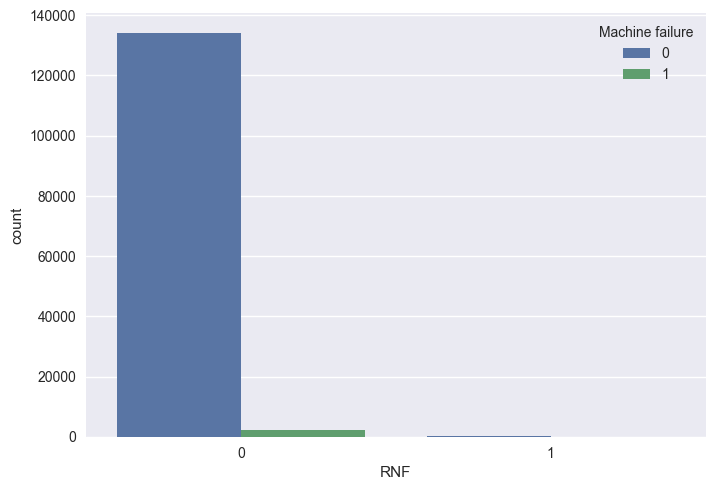

In [214]:
# Проведем анализ распределений признаков в зависимости от целевой переменной
cols  = data.columns
for i in cols[2:]:
    if(data[i].dtype.kind in 'if' and data[i].value_counts().count()>=5):
        sns.histplot(data=data,x=i,hue='Machine failure',kde=True)
    else:
        data[i] = data[i].astype(str)
        sns.countplot(data=data,x=i,hue="Machine failure",dodge=True)
    plt.show()

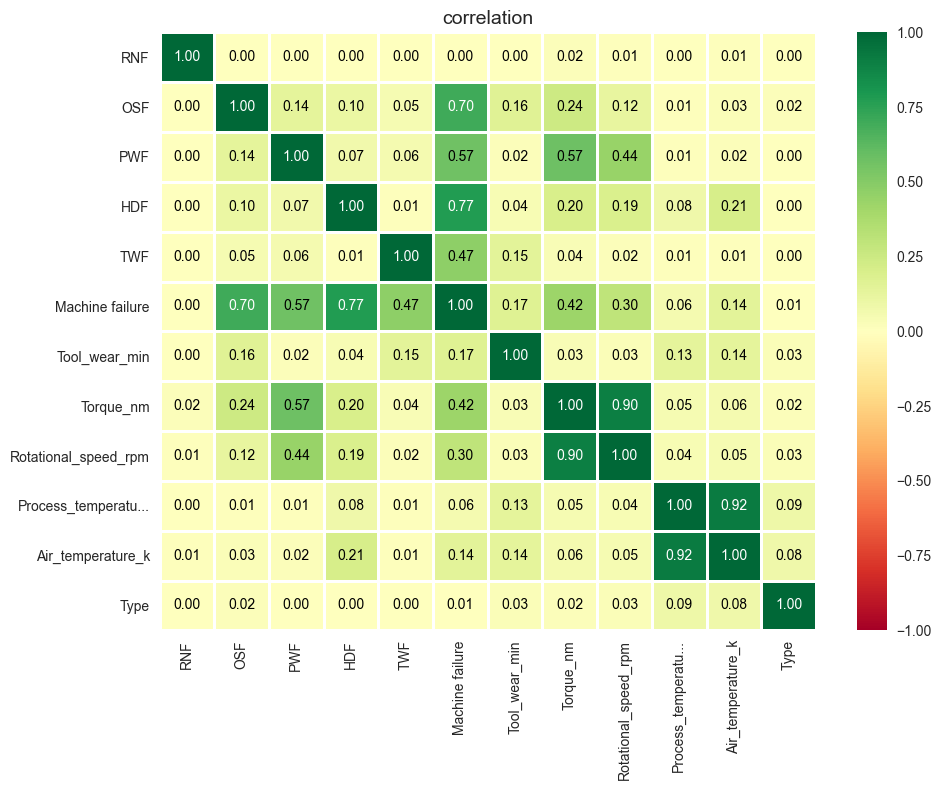

In [215]:
corr_matrix = data.phik_matrix(interval_cols=numeric_cols)

plot_correlation_matrix(
    corr_matrix.values, 
    x_labels=corr_matrix.columns, 
    y_labels=corr_matrix.index, 
    figsize=(10, 8)
)

# Анализ корреляций и рекомендации

## 1. Сильная мультиколлинеарность

- **Torque** и **Rotational speed**: **–0.90**  

**Проблема:** может ухудшить стабильность линейных моделей.

---

## 2. Сильная положительная корреляция

- **Process temperature** и **Air temperature (K)**: **0.92**  
  Температуры связаны

---

## 3. Целевая переменная Machine failure

### 3.1. Корреляции с типами отказов

- **HDF (Heat Dissipation Failure):** 0.77  
- **OSF (Overstrain Failure):** 0.70  
- **PWF (Power Failure):** 0.57  
- **TWF (Tool Wear Failure):** 0.47

### 3.2. Корреляции с техническими параметрами

- **Torque_Nm:** 0.42  
- **Rotational speed:** 0.30  
- **Tool wear:** 0.17  
- **Температуры:** слабые корреляции (0.06–0.14)

---

## 4. Драйверы различных типов отказов

- **HDF:** связана с температурами (φK до 0.21) — тепловой режим.  
- **PWF:** связана с Torque_nm (0.57) и Rotational_speed_rpm (0.44) — режим нагрузки и мощности.  
- **OSF:** умеренная связь с Torque_nm (~0.24) — перегрузка.  
- **TWF:** связана с Tool_wear_min (~0.15) — накопленный износ.  
- **RNF:** практически не связан ни с одним параметром.

**Вывод:** разные типы отказов имеют разные физические причины.

---

# Рекомендации для моделирования

## 1. Объединить сильно коррелирующие признаки

```python
data['Power'] = data['Torque_nm]'] * data['Rotational_speed_rpm']
data['Temperature_difference'] = data['Process_temperature_k'] - data['Air_temperature_k']
```

## 2. Взаимодействия между параметрами и типами отказов

```python
data["Torque_Wear_interaction"] = data["Torque_nm"] * data["Tool_wear_min"]
```

Признак `Torque_Wear_interaction` отражает ситуацию,  
когда **одновременно высоки и нагрузка (Torque), и износ (Tool wear)**.  
По отдельности высокий torque или высокий износ ещё не гарантируют отказ,  
но их комбинация резко повышает риск поломки.

Для линейных моделей (например, логистической регрессии) такая interaction-фича  
позволяет поймать нелинейный эффект, который иначе модель не увидит.

In [216]:
# 1. Создаем инженерные признаки
data["Power"] = data["Torque_nm"] * data["Rotational_speed_rpm"] # агрегированная нагрузка
data["Temperature_difference"] = data["Process_temperature_k"] - data["Air_temperature_k"]  # тепловой перепад
data["Torque_Wear_interaction"] = data["Torque_nm"] * data["Tool_wear_min"] # риск при нагрузке+износе

# 2. Удаляем флаги отказов и признаки, которые больше не нужны
data = data.drop(columns=[
    "TWF", "HDF", "PWF", "OSF", "RNF",   # флаги отказов (нельзя использовать)
    "Air_temperature_k",                 # заменён на Temperature_difference
    "Rotational_speed_rpm",              # учтён в Power
    "Torque_nm"                          # учтён в Power и Torque_Wear_interaction
])

# 3. Обновляем список числовых признаков
numeric_cols = [
    "Process_temperature_k",
    "Tool_wear_min",
    "Power",
    "Temperature_difference",
    "Torque_Wear_interaction",
]

# 4. Приводим числовые признаки к float32
for col in numeric_cols:
    data[col] = data[col].astype("float32")

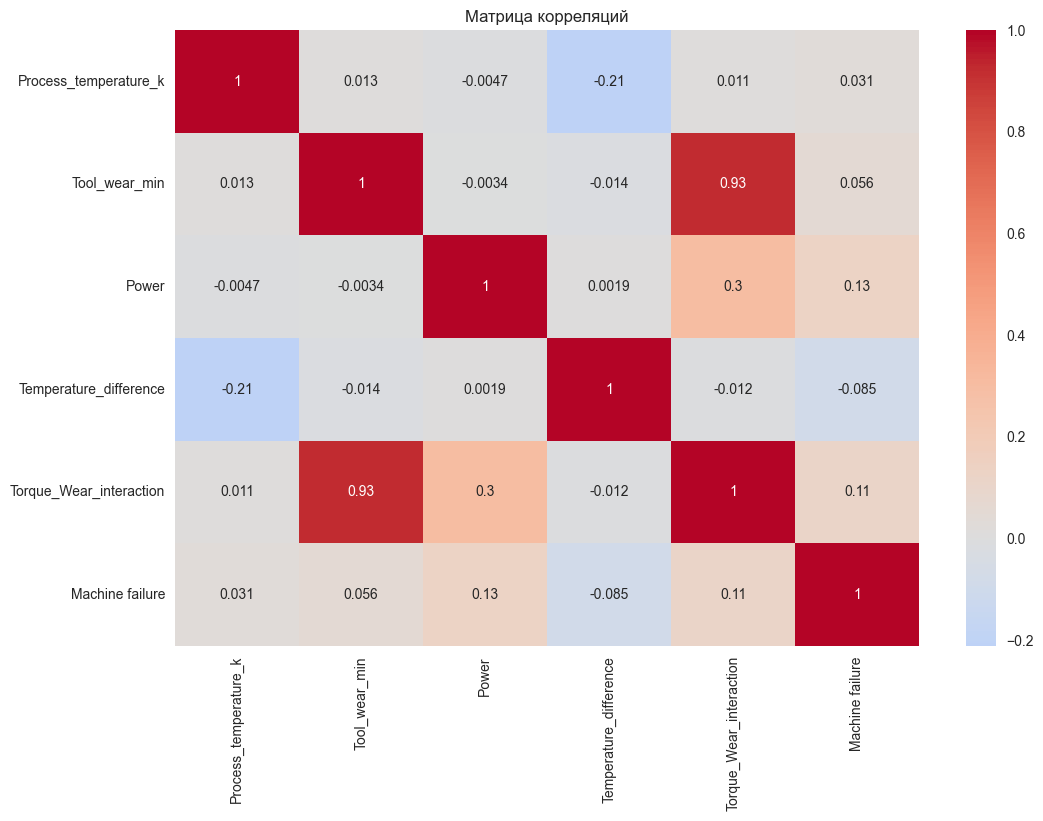

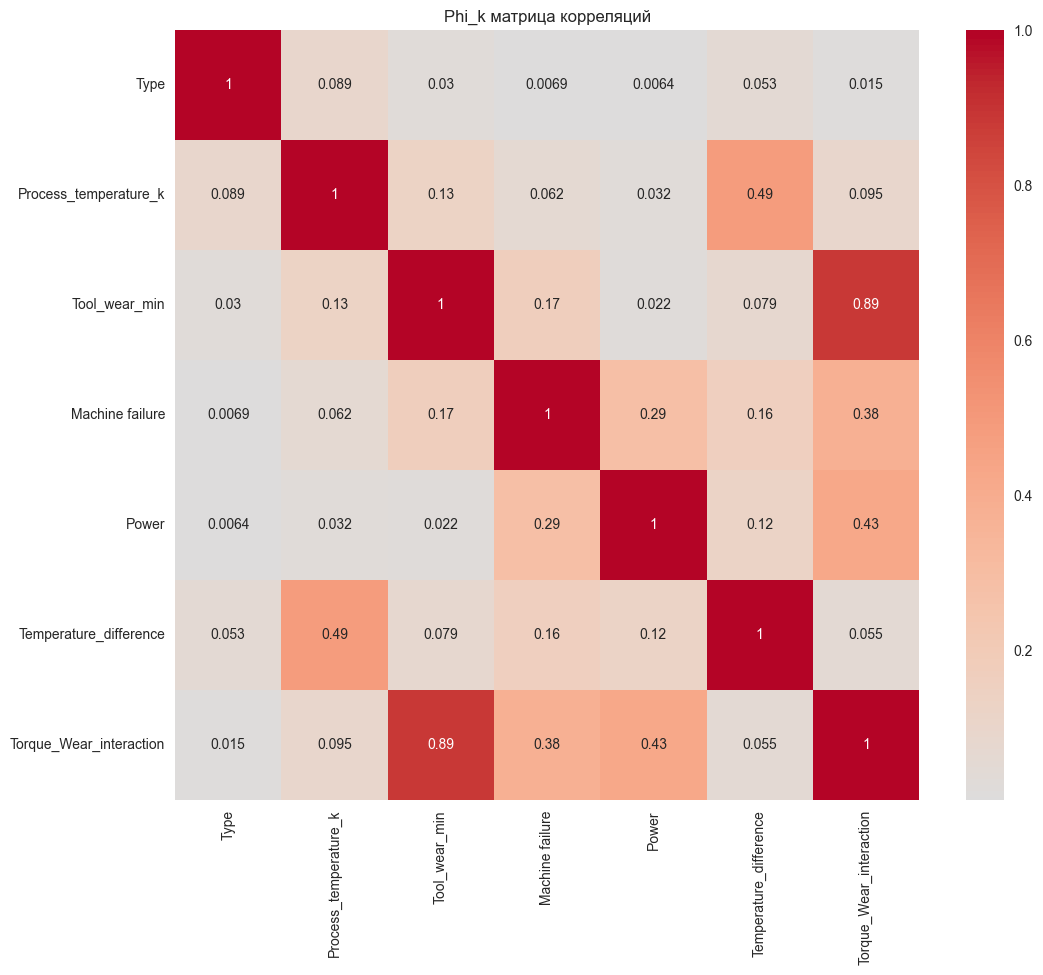

In [217]:
# Матрица корреляций
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_cols + ['Machine failure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

# Phi_k корреляция для категориальных и числовых признаков
if 'phik' in locals():
    phik_matrix = data.phik_matrix(interval_cols=numeric_cols)
    plt.figure(figsize=(12, 10))
    sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Phi_k матрица корреляций')
    plt.show()

## 4. Общий вывод по результатам исследования


Матрица корреляций показывает, что:

- Явных сильных связей между базовыми параметрами и отказами немного - признаки в целом независимы, что хорошо для моделирования.
- Power и Torque_Wear_interaction умеренно связаны с Machine failure (0.29 и 0.38), что подтверждает влияние нагрузки и её сочетания с износом.
- Tool_wear_min и Torque_Wear_interaction ожидаемо сильно коррелируют (0.89) - interaction-фича отражает реальную физику процесса.
- Temperature_difference заметно связана с Process_temperature_k (0.49), что логично.
- Признак Type почти не связан с другими параметрами, что говорит о его независимости как категориального фактора.

В целом данные показывают, что различные характеристики оборудования влияют на отказы по-разному, и комбинированные признаки (Power, Torque×Wear) дают более сильные сигналы, чем отдельные параметры. Это подтверждает необходимость использования взаимодействий и инженерии признаков.

Вопросы:

* Удалять ли флаги или делать отдельную модель на каждый флаг
